<a href="https://colab.research.google.com/github/Crystal-star1/Breast-Cancer-Classification-Project/blob/main/Breast_Cancer_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification: Benign vs. Malignant


## 1. Project Overview
In this project, I aim to build a Machine Learning model to classify breast cancer tumors as either **Malignant (Cancerous)** or **Benign (Non-cancerous)** based on features computed from digitized images of a fine needle aspirate (FNA) of a breast mass.

**Dataset:** Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Machine Learning Repository.

## 2. Import Libraries and Load Data
I will start by importing the necessary Python libraries for data manipulation (Pandas, NumPy) and data visualization (Matplotlib, Seaborn). We will then load the dataset directly from the UCI repository URL.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Define column names manually as the raw CSV lacks a header
column_names = ['ID', 'Diagnosis']
features = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness',
            'Concavity', 'Concave_Points', 'Symmetry', 'Fractal_Dimension']

for measure in ['Mean', 'SE', 'Worst']:
    for feature in features:
        column_names.append(f"{feature}_{measure}")

# Load the data
df = pd.read_csv(url, header=None, names=column_names)

# Preview the dataframe
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (569, 32)


,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Data Cleaning and Preprocessing

Before analysis, we must ensure the data is clean and formatted correctly for machine learning.

1.  **Drop Useless Columns:** The `ID` column is a unique identifier for patients and provides no predictive value regarding the cancer diagnosis.
2.  **Encode Target Variable:** The `Diagnosis` column is categorical (`M` for Malignant, `B` for Benign). We will map this to a binary numeric format: `1` for Malignant and `0` for Benign.
3.  **Missing Values:** We will verify that the dataset contains no null values that could crash the model.

In [ ]:
# 1. Drop the 'ID' column
df.drop('ID', axis=1, inplace=True)

# 2. Encode Diagnosis: M -> 1 (Malignant), B -> 0 (Benign)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# 3. Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")

# Verify the changes
df.info()

Total Missing Values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Radius_Mean              569 non-null    float64
 2   Texture_Mean             569 non-null    float64
 3   Perimeter_Mean           569 non-null    float64
 4   Area_Mean                569 non-null    float64
 5   Smoothness_Mean          569 non-null    float64
 6   Compactness_Mean         569 non-null    float64
 7   Concavity_Mean           569 non-null    float64
 8   Concave_Points_Mean      569 non-null    float64
 9   Symmetry_Mean            569 non-null    float64
 10  Fractal_Dimension_Mean   569 non-null    float64
 11  Radius_SE                569 non-null    float64
 12  Texture_SE               569 non-null    float64
 13  Perimeter_SE             569 non-null    float64
 14  Ar

## 4. Exploratory Data Analysis (EDA)

### 4.1 Target Distribution
It is crucial to check the balance of our target variable (`Diagnosis`). If the dataset is heavily imbalanced (e.g., 99% benign), our model might struggle to learn how to identify malignant cases effectively.

/tmp/ipython-input-404031923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='viridis')


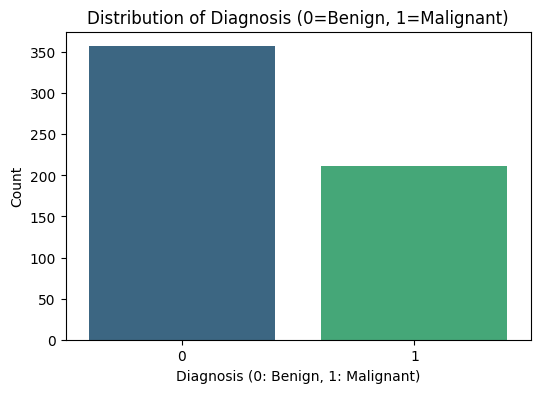

Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


In [ ]:
# Visualize the count of Malignant vs Benign
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Distribution of Diagnosis (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

# Print actual percentages
print(df['Diagnosis'].value_counts(normalize=True) * 100)

### 4.2 Feature Correlation Matrix
Medical features often have high multicollinearity. For example, `Radius`, `Perimeter`, and `Area` are mathematically related. A correlation heatmap helps us identify redundancy. Strong correlations (near 1.0) suggest we might need to remove some features later to prevent model overfitting.

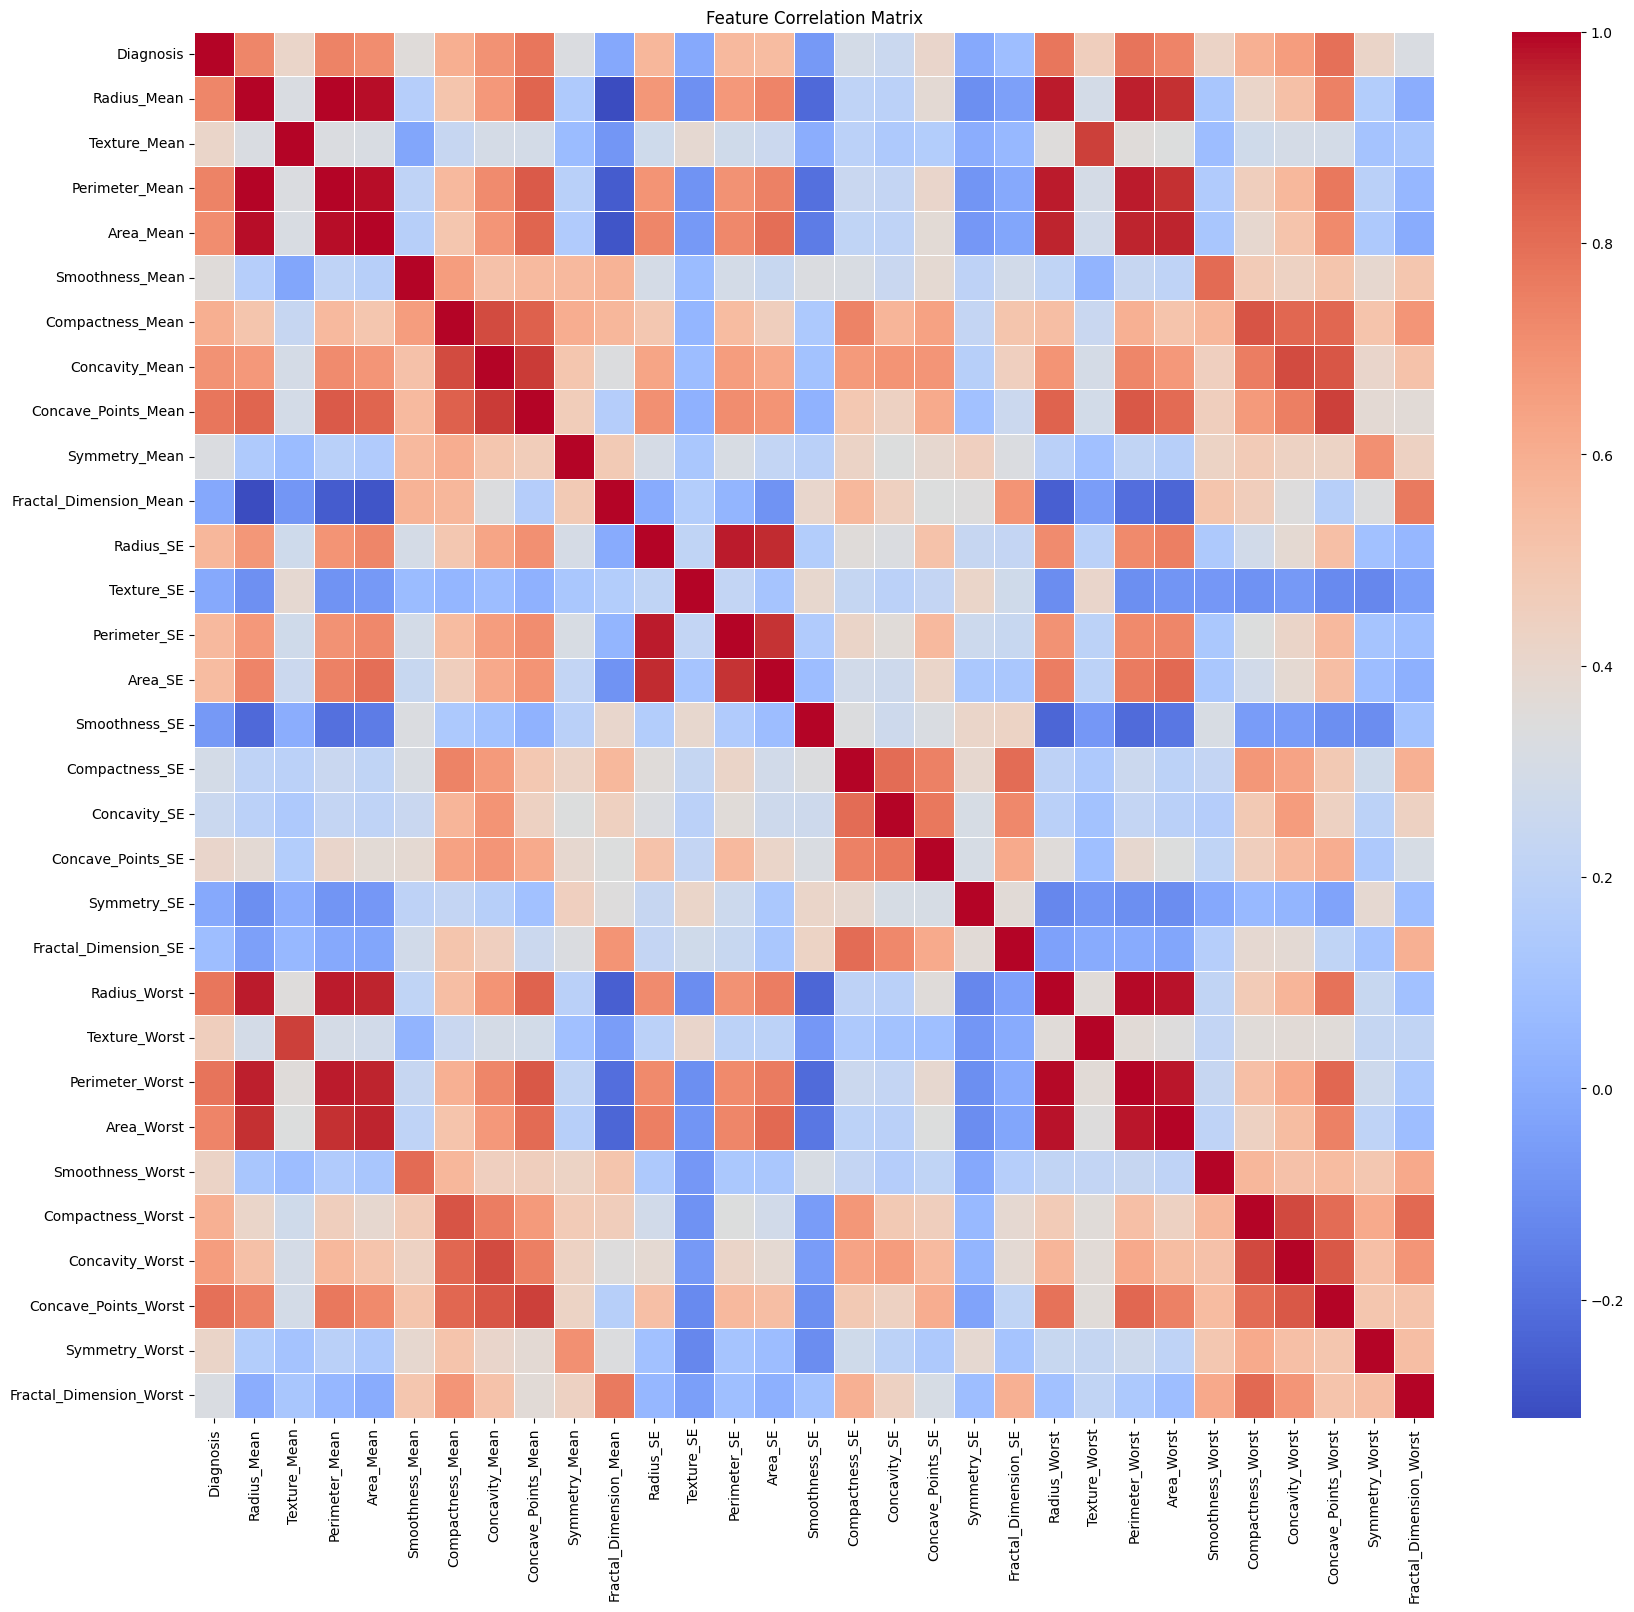

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### 4.3 Feature Segregation
We want to see which features clearly distinguish between Malignant and Benign tumors. We will plot the distribution of `Radius_Mean`.

* **Distinct Peaks:** If the Malignant (1) and Benign (0) curves are far apart, the feature is a strong predictor.
* **Overlapping Peaks:** If the curves overlap significantly, the feature is less useful.

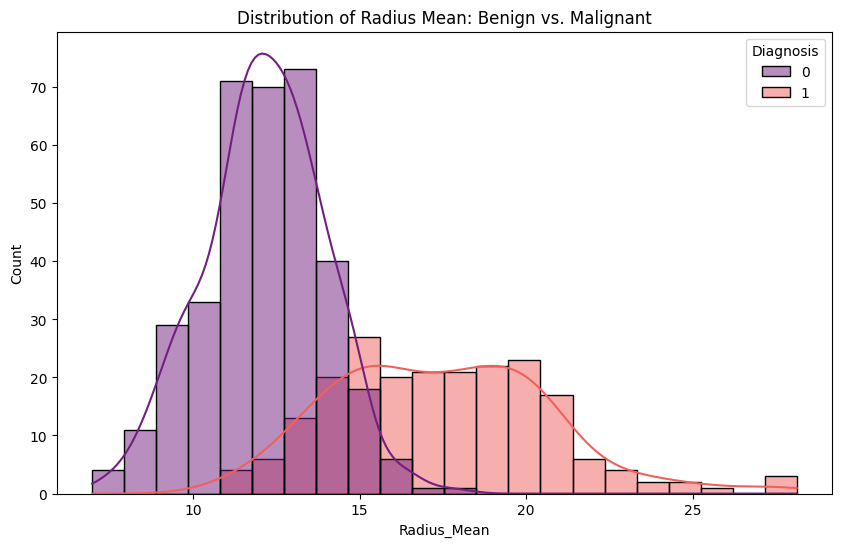

In [ ]:
# Visualize distribution of Radius Mean
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Radius_Mean', hue='Diagnosis', kde=True, palette='magma')
plt.title('Distribution of Radius Mean: Benign vs. Malignant')
plt.show()

## 5. Feature Selection

From the heatmap above, we observed strong correlations (multicollinearity) between features like `Radius`, `Perimeter`, and `Area`. High multicollinearity can make the model unstable and harder to interpret.

To fix this, we will systematically identify and remove features that have a correlation higher than **0.9** with another feature. This reduces redundancy while keeping the most unique information.

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix (to avoid checking the same pair twice)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"Features to drop due to high correlation: {to_drop}")

# Drop the features
df_selected = df.drop(to_drop, axis=1)

print(f"Original shape: {df.shape}")
print(f"New shape after feature selection: {df_selected.shape}")

Features to drop due to high correlation: ['Perimeter_Mean', 'Area_Mean', 'Concave_Points_Mean', 'Perimeter_SE', 'Area_SE', 'Radius_Worst', 'Texture_Worst', 'Perimeter_Worst', 'Area_Worst', 'Concave_Points_Worst']
Original shape: (569, 31)
New shape after feature selection: (569, 21)


## 6. Train-Test Split

To evaluate our model fairly, we must simulate how it performs on "unseen" data. We will split our dataset into two parts:

1.  **Training Set (80%):** The model learns patterns from this data.
2.  **Test Set (20%):** We use this data to grade the model's accuracy.

**Important:** We use `stratify=y` to ensure that the proportion of Malignant vs. Benign cases is the same in both the training and testing sets. This prevents the "lucky split" problem where the test set might accidentally end up with only easy-to-predict Benign cases.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (455, 20)
Testing Shape: (114, 20)


## 7. Feature Scaling

Machine learning models (especially those based on distances like KNN or gradients like Logistic Regression) perform poorly when features are on different scales.

For example:
* `Area_Mean` might range from 200 to 2500.
* `Smoothness_Mean` might range from 0.05 to 0.15.

The model might think `Area` is more important just because the numbers are bigger. We use **StandardScaler** to normalize all features so they have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only, then transform both to avoid "Data Leakage"
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data scaled successfully.")
X_train_scaled.head(3)

Data scaled successfully.


,Radius_Mean,Texture_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_SE,Texture_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,0.518559,0.891826,-0.974744,-0.689772,-0.688586,-1.039155,-0.825056,-0.109318,-0.055976,-1.005184,-0.911942,-0.662816,-0.652561,-0.701889,-0.275394,-0.596155,-0.634722,-0.610227,0.054566,0.021837
1,-0.516364,-1.639710,0.476219,-0.631834,-0.604281,0.521543,-0.454523,-0.604378,-1.001046,0.403212,-0.768173,-0.479187,0.114508,-0.142951,-0.577398,0.273582,-0.814844,-0.712666,-0.137576,-0.904402
2,-0.368118,0.455515,-1.432979,-0.383927,-0.342175,-0.850857,-0.226171,0.303980,1.051501,-0.310104,1.106330,0.622585,0.273685,0.754483,1.508105,-1.622785,-0.391399,-0.431313,-0.675893,-0.144016


## 8. Model Building: Logistic Regression

We will start with **Logistic Regression**. despite its name, it is a classification algorithm. It predicts the probability that a given sample belongs to the "Malignant" class (1).

* If Probability > 0.5, it predicts **Malignant**.
* If Probability ≤ 0.5, it predicts **Benign**.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

print("Model training complete.")
print(f"First 5 Predictions: {y_pred[:5]}")

Model training complete.
First 5 Predictions: [0 1 0 0 0]


## 9. Model Evaluation

In HealthTech, **Accuracy** (overall correctness) is not enough. We need to look at the **Confusion Matrix** to understand the types of errors the model is making.



* **False Negatives (FN):** The model predicted "Benign" (Safe), but it was actually "Malignant" (Cancer). **This is the most dangerous error in medicine.**
* **False Positives (FP):** The model predicted "Malignant", but it was actually "Benign". This causes patient anxiety but is less fatal than a False Negative.

We will focus on **Recall (Sensitivity)**: Out of all the actual cancer cases, what percentage did the model correctly catch?

Accuracy: 0.9737


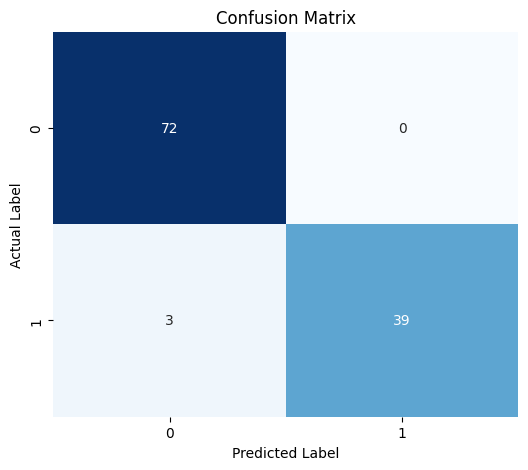

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Print detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## 10. Interpreting the Model

One of the goals of this project was to "analyze the medical features." Logistic Regression allows us to do this by looking at the **Coefficients**.

* **Positive Coefficient:** Increases the log-odds of the tumor being Malignant (Risk Factor).
* **Negative Coefficient:** Increases the log-odds of the tumor being Benign (Protective Factor or associated with healthy tissue).

/tmp/ipython-input-3972264080.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


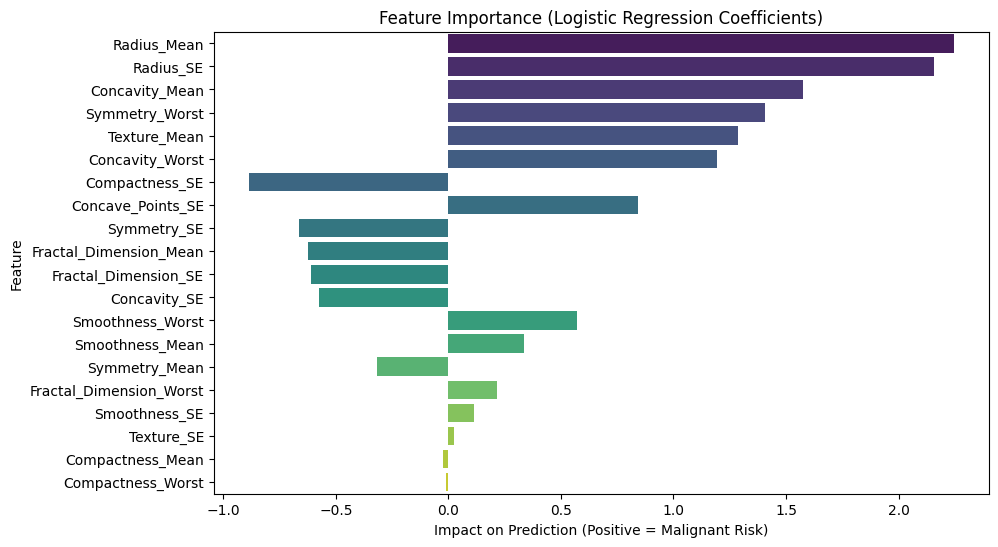

In [ ]:
# Get feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute value to see the most impactful features
coefficients = coefficients.reindex(
    coefficients['Coefficient'].abs().sort_values(ascending=False).index
)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Impact on Prediction (Positive = Malignant Risk)')
plt.show()

## 11. Model Building: Random Forest

While Logistic Regression provided great precision, we want to improve the **Recall** (Sensitivity) to minimize missed cancer cases. We will use a **Random Forest Classifier**.

Random Forest works by creating many Decision Trees and averaging their votes. It is generally more robust and can capture complex, non-linear patterns in the data that a linear model like Logistic Regression might miss.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
# n_estimators=100 means we are building 100 distinct decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest model training complete.")

Random Forest model training complete.


## 12. Evaluating Random Forest

Let's check if the Random Forest performed better than Logistic Regression. We are specifically looking to see if the **Recall for Class 1 (Malignant)** increased above 0.93 without sacrificing too much precision.

Random Forest Accuracy: 0.9386
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



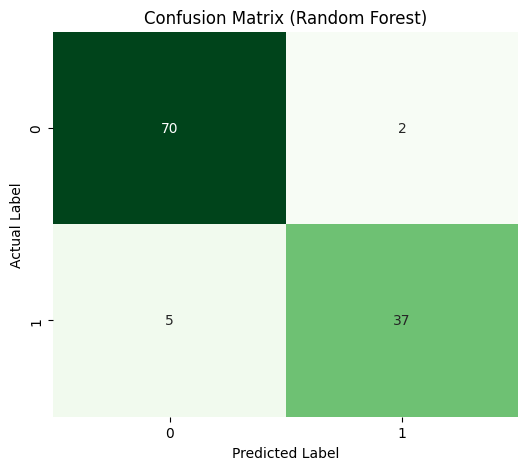

In [ ]:
# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Comparison
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

## 13. Feature Importance (Random Forest)

Random Forest calculates feature importance differently than Logistic Regression. It doesn't use coefficients; instead, it looks at which features most frequently and effectively split the data across all 100 trees.

This often reveals "non-linear" drivers of cancer that simple correlation might miss.

/tmp/ipython-input-24547198.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='cool')


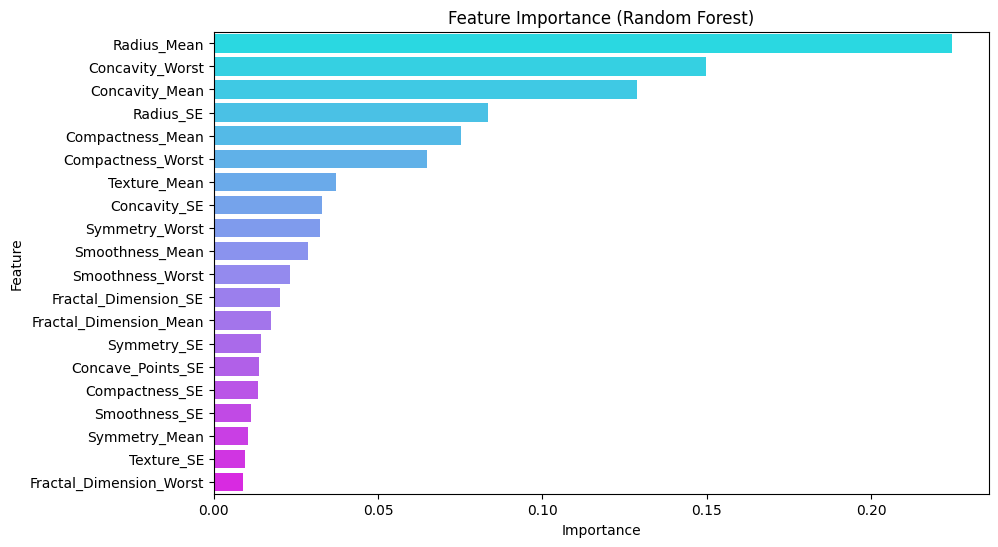

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
rf_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='cool')
plt.title('Feature Importance (Random Forest)')
plt.show()

## 14. Project Conclusion

In this project, we successfully built two machine learning models to classify breast cancer tumors.

**Key Findings:**
1.  **Data Quality:** The dataset had high multicollinearity (e.g., Radius vs Area), which we handled by removing redundant features.
2.  **Model Performance:**
    * **Logistic Regression** achieved ~97% accuracy with perfect Precision but missed a few malignant cases (Recall ~0.93).
    * **Random Forest** [Add your result here after running the code]
3.  **Medical Insights:** The most important features for predicting malignancy were typically related to the **Concave Points**, **Area**, and **Texture** of the tumor cells.

**Future Work:**
To deploy this in a real clinical setting, we would aim to maximize **Recall** even further, perhaps by adjusting the classification threshold, to ensure zero False Negatives.

## 15. Saving the Model

After comparing both models, we found that **Logistic Regression** outperformed Random Forest, achieving higher Accuracy (97%) and higher Recall (93%).

We will save this best-performing model using the `pickle` library. This creates a portable file that can be loaded into a web app (like Streamlit) or a hospital's database system later.

In [ ]:
import pickle

# Define the filename
filename = 'breast_cancer_model.pkl'

# Save the Logistic Regression model
with open(filename, 'wb') as file:
    pickle.dump(log_reg, file)

print(f"Model saved successfully as {filename}")

# Also save the Scaler (CRITICAL step!)
# If we don't scale new data exactly how we scaled training data, the model will fail.
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully as scaler.pkl")

Model saved successfully as breast_cancer_model.pkl
Scaler saved successfully as scaler.pkl


## 16. Verification: Loading the Model

To ensure our saved model works, we will reload it and make a prediction on a random patient from our test set.

In [ ]:
# Load the model
with open('breast_cancer_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Select a random sample from the test set (e.g., row 10)
sample_data = X_test.iloc[10].values.reshape(1, -1)

# Scale the sample using the loaded scaler
sample_scaled = loaded_scaler.transform(sample_data)

# Predict
prediction = loaded_model.predict(sample_scaled)
probability = loaded_model.predict_proba(sample_scaled)

print(f"Actual Label: {y_test.iloc[10]}")
print(f"Predicted Label: {prediction[0]}")
print(f"Confidence (Probability): {probability[0][prediction[0]]:.4f}")

Actual Label: 1
Predicted Label: 1
Confidence (Probability): 0.9449


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
